In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
df = pd.read_csv('data_reli_new.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-18,478.000000,478.000000,471.100006,472.049988,452.040710,3031166.0
1,2015-08-19,472.000000,480.500000,469.725006,477.299988,457.068115,4058402.0
2,2015-08-20,479.975006,479.975006,456.875000,458.149994,438.729919,8689858.0
3,2015-08-21,455.000000,455.950012,448.500000,453.975006,434.731903,9166424.0
4,2015-08-24,440.000000,440.000000,409.000000,414.774994,397.193512,16291446.0
5,2015-08-25,420.424988,430.325012,411.600006,424.075012,406.099335,22631686.0


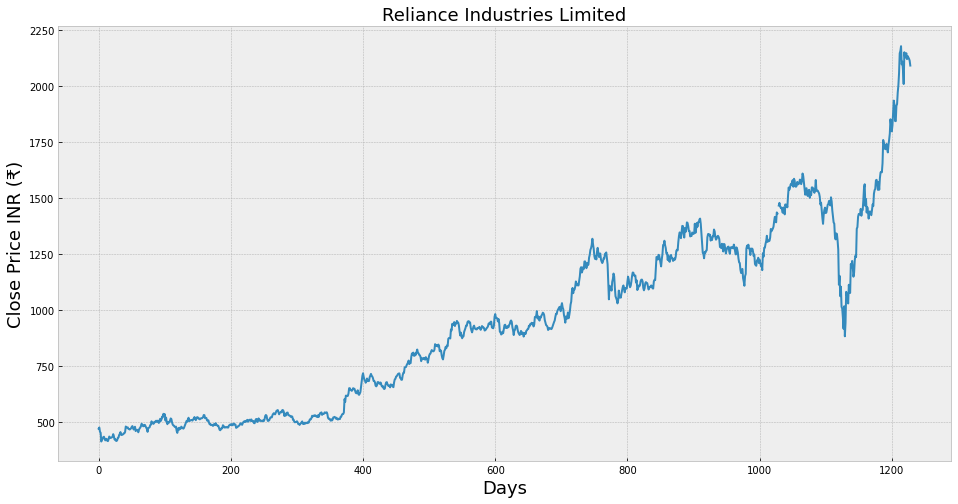

In [4]:
plt.figure(figsize=(16,8))
plt.title('Reliance Industries Limited', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price INR (₹)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [5]:
df = df[['Close']]
df.head(4)
df.dropna()

,Close
0,472.049988
1,477.299988
2,458.149994
3,453.975006
4,414.774994
...,...
1224,2133.800049
1225,2127.600098
1226,2122.050049
1227,2113.800049


In [6]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)


,Close,Prediction
1225,2127.600098,NaN
1226,2122.050049,NaN
1227,2113.800049,NaN
1228,2091.350098,NaN


In [7]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X = X[~np.isnan(X)]
X = X.reshape(-1,1)

print(X)

[[ 472.049988]
 [ 477.299988]
 [ 458.149994]
 ...
 [1824.25    ]
 [1878.050049]
 [1935.      ]]


In [8]:
y = np.array(df['Prediction'])[:-future_days]
y = y[~np.isnan(y)]
y = y.reshape(-1,1)
print(y)

[[ 425.174988]
 [ 418.674988]
 [ 417.125   ]
 ...
 [2122.050049]
 [2113.800049]
 [2091.350098]]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [11]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[1537.150024],
       [1572.150024],
       [1537.699951],
       [1588.800049],
       [1614.550049],
       [1617.699951],
       [1615.349976],
       [1655.900024],
       [1759.400024],
       [1746.150024],
       [1720.900024],
       [1727.849976],
       [1717.900024],
       [1741.650024],
       [1723.150024],
       [1704.099976],
       [1737.599976],
       [1760.349976],
       [1787.900024],
       [1851.800049],
       [1823.449951],
       [1798.      ],
       [1824.25    ],
       [1878.050049],
       [1935.      ]])

In [12]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1917.       1529.400024 1843.400024 1911.699951 1919.900024 2004.
 2004.       2057.800049 2146.149902 2126.449951 2177.699951 2096.649902
 2177.699951 2126.449951 2009.       2150.600098 2126.449951 2134.100098
 2146.449951 2119.850098 2133.800049 2127.600098 2122.050049 2113.800049
 2113.800049]

[[1587.35083254]
 [1623.33142939]
 [1587.91616687]
 [1640.44793902]
 [1666.91937813]
 [1670.1575311 ]
 [1667.74171672]
 [1709.42785756]
 [1815.82762252]
 [1802.20639657]
 [1776.24896599]
 [1783.39363516]
 [1773.16491483]
 [1797.58031983]
 [1778.56200436]
 [1758.97823016]
 [1793.41680143]
 [1816.80418938]
 [1845.12610853]
 [1910.8164239 ]
 [1881.67203971]
 [1855.50905609]
 [1882.49450372]
 [1937.80187153]
 [1996.34739232]]


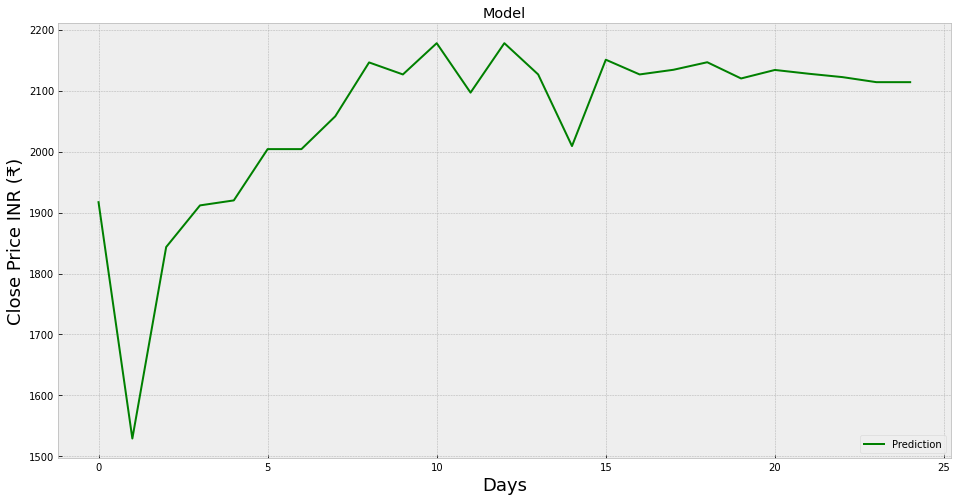

In [38]:
predictions = tree_prediction

predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.plot(predictions,color='green')
plt.legend(['Prediction' ], loc='lower right')
